In [211]:
import numpy as np
import pandas as pd
from IPython.display import display
customers_df=pd.read_csv('customers.csv')
items_df=pd.read_csv('Items.csv')
orders_df=pd.read_csv('orders.csv')
order_item_df=pd.read_csv('order_item.csv')


In [213]:
#1. What is the average price of an item?
display("average price:",items_df['item_price'].mean())

'average price:'

2222.0825999999997

In [239]:
#2.Which customer has purchased the most products?
merded_orders_Items_order=orders_df.merge(order_item_df,'inner')
groups_sum=merded_orders_Items_order.groupby('customer_id')['quantity'].sum().sort_values(ascending=False)

max_customer_id = groups_sum.index[0]
max_customer=customers_df[customers_df['id']==max_customer_id]
display("the customer with most items is:",max_customer)

'the customer with most items is:'

,id,first_name,last_name,gender,age,nationallity,joining_date,phone_number,email
137,138,Ellary,Ledner,NaN,63.0,Peru,NaN,343-500-4046,eledner3t@latimes.com


In [217]:
import matplotlib.pyplot as plt
customer_df_clean = customers_df.dropna()
orders_df_clean=orders_df.dropna()
order_item_df_clean=order_item_df.dropna()

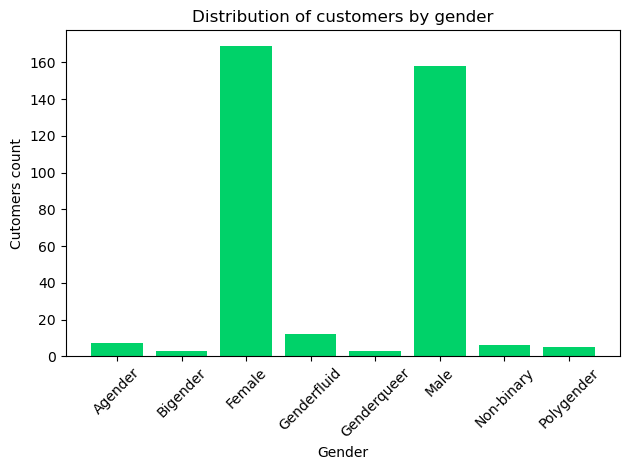

In [219]:
#1. Distribution of customers by gender

gender_groups=customer_df_clean.groupby('gender')['id'].count()
values_y_gender=gender_groups.values
values_x_gender=gender_groups.index
fig, ax = plt.subplots()
ax.bar(values_x_gender ,values_y_gender,color='#00d269')
ax.set_xticks(values_x_gender)
ax.set_xticklabels(values_x_gender, rotation=45)
plt.title("Distribution of customers by gender")
plt.xlabel('Gender')
plt.ylabel('Cutomers count')
plt.tight_layout() 
plt.show()

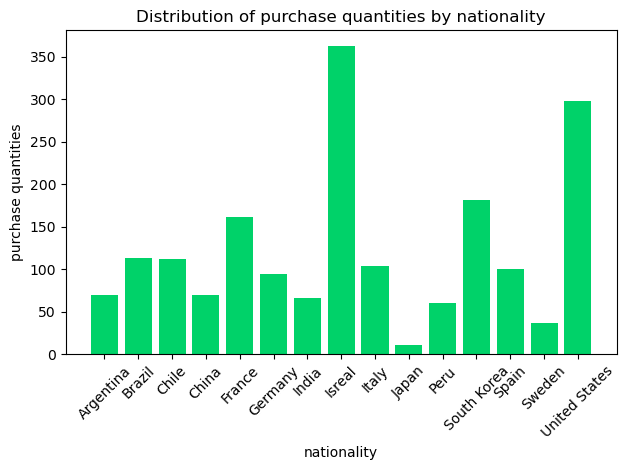

In [221]:
#2. Distribution of purchase quantities by nationality
merded_orders_Items_order=orders_df.merge(order_item_df,'inner')
groups_sum=merded_orders_Items_order.groupby('customer_id')['quantity'].sum().sort_values(ascending=False)
groups_sum_df = groups_sum.reset_index(name='total_quantity')
groups_sum_df_merged=groups_sum_df.merge(customer_df_clean[['id', 'nationallity']],how='inner',left_on='customer_id',right_on='id')

nationallity_groups=groups_sum_df_merged.groupby('nationallity')['total_quantity'].sum()
values_y_nationallity=nationallity_groups.values
values_x_nationallity=nationallity_groups.index
fig, ax = plt.subplots()
ax.bar(values_x_nationallity ,values_y_nationallity,color='#00d269')
ax.set_xticks(values_x_nationallity)
ax.set_xticklabels(values_x_nationallity, rotation=45)
plt.title("Distribution of purchase quantities by nationality")
plt.xlabel('nationality')
plt.ylabel('purchase quantities')
plt.tight_layout() 
plt.show()